In [251]:
%pip install pandas
%pip install numpy
%pip install sklearn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


# О датасете

Был выбран датасет отображающий информацию о людях: возраст, занятость, образование, семейное положение, происхождение, отношения, раса, пол, увеличение или потерю капитала, количество рабочих часов в неделю, страна происхождения и информация о доходах. Задача: по указанным признакам определить, что доход человека больше или не привышает 50 тысяч долларов.

[Ссылка на источник.](https://www.kaggle.com/wenruliu/adult-income-dataset "Adult income dataset")

# Работа с датасетом

Исходный файл формата csv формата имеет 48842 записи. Всего 6 количественных признаков и 8 качественных признаков. Отсутствующие данные отмечены знаком вопроса '?'.

In [252]:
import pandas as pd
data = pd.read_csv("./adult.csv", na_values = "?")
data

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


Как видно, данные отсутствуют в 3х столбцах: workclass, occupation, native-country.  Всего ячеек с пропущенными данными 0.9 процента, а вот "людей" с пропущенными данными уже 7%, что не так много, в принципе, поэтому просто удалим эти строки.

In [253]:
missing_values_count = data.isnull().sum()
missing_values_count

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [254]:
print("precent missing cells = " + str(missing_values_count.sum()/(data.shape[0]*data.shape[1])*100))
print("precent of lines with missing data = " + str((data.shape[0]-data.dropna().shape[0])/data.shape[0]*100))


precent missing cells = 0.8824372466319971
precent of lines with missing data = 7.411653904426519


In [255]:
data = data.dropna()
#data = data.drop_duplicates(subset = list(data.columns)[0:-1])
data.reset_index(inplace=True, drop=True)
data

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45217,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
45218,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
45219,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
45220,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


Соотношение мужчин и женищн 30527 к 14695, что примерно 2 к 1.

Male      30527
Female    14695
Name: gender, dtype: int64


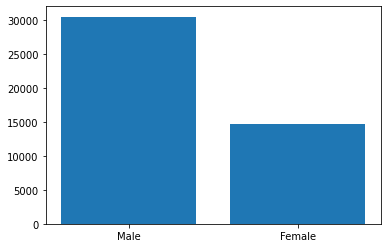

In [256]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots() 
dat = data['gender'].value_counts() 
print(dat)
# get x and y data 
points = dat.index 
frequency = dat.values 
# create bar chart 
ax.bar(points, frequency);
#plt.plot(points, frequency, 'o')

Попробуем обнаружить кореляцию между количественными признакми.

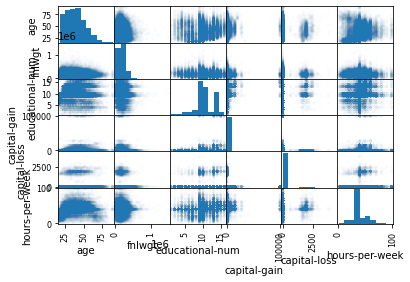

In [257]:


coli = ['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']        
pd.plotting.scatter_matrix(data[coli], alpha=0.01);


Кореляция не обнаружена.
Посмотрим на распределение возрастов.

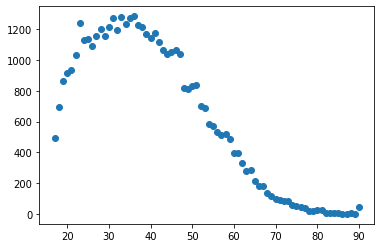

In [258]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots() 
dat = data['age'].value_counts() 
# get x and y data 
points = dat.index 
frequency = dat.values 
# create bar chart 
#ax.bar(points, frequency);
plt.plot(points, frequency, 'o');

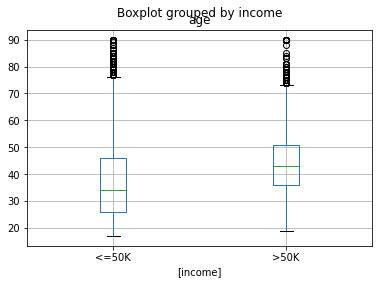

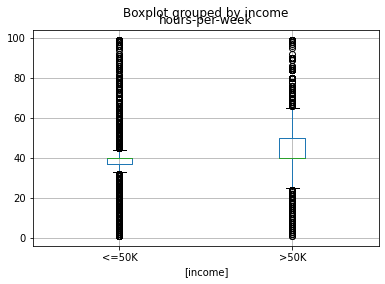

In [259]:
data[['income', 'age' ]].boxplot(by= 'income');
data[['income', 'hours-per-week' ]].boxplot(by= 'income');

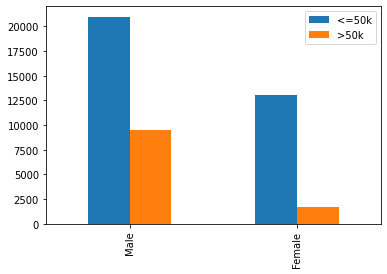

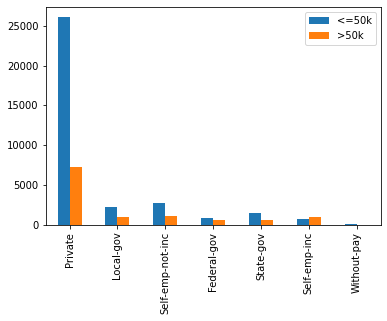

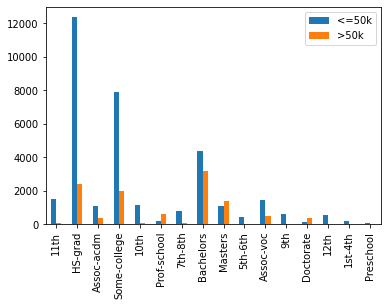

In [260]:
for feat in ['gender', 'workclass', 'education']:
    income = {}
    for i in range(data.shape[0]):
        if income.get(data[feat][i]) == None:
            income[data[feat][i]]=[0,0]
        if data['income'][i] == '<=50K':
            income[data[feat][i]][0]+=1
        else:
            income[data[feat][i]][1]+=1
    indexes = list(income.keys())
    less = [ income[ind][0] for ind in income ]
    more = [ income[ind][1] for ind in income ] 
    pd.DataFrame({'<=50k': less,'>50k': more}, index=indexes).plot.bar();

По полученным графикам можно сделать несколько выводов:
* Количество людей, получающих меньше 50 тысяч больше, чем получающих больше 50 тысяч;
* Более старшие люди и работающие больше 40 часов в неделю более вероятно получаютбольше 50 тысяч людей
* С увеличением уровня обучения повышается количество людей, получающих больше 50 тысяч.

Так как столбцы education и education-num содержат одинаковую информацию, то удалим столбец education. Ещё уберём столбцы capital-loss и capital-gain, т.к. они почти все нули. Так же уберём marital-status т.к. он, по идее, должен быть связан с relationship, а так же fnlwgt, т.к. это какая-то информация из базы переписи, а её смысл непонятен.
А так же заменим все качественные признаки на числа для более удобной работы.

In [261]:
data=data.drop(labels=['education', 'capital-loss', 'capital-gain', 'marital-status', 'fnlwgt'], axis=1)


In [262]:
columns = ['workclass', 'occupation', 'relationship', 'race', 'gender', 'native-country', 'income']
data[columns] = data[columns].apply(lambda col:pd.Categorical(col).codes)
data        

,age,workclass,educational-num,occupation,relationship,race,gender,hours-per-week,native-country,income
0,25,2,7,6,3,2,1,40,38,0
1,38,2,9,4,0,4,1,50,38,0
2,28,1,12,10,0,4,1,40,38,1
3,44,2,10,6,0,2,1,40,38,1
4,34,2,6,7,1,4,1,30,38,0
...,...,...,...,...,...,...,...,...,...,...
45217,27,2,12,12,5,4,0,38,38,0
45218,40,2,9,6,0,4,1,40,38,1
45219,58,2,9,0,4,4,0,40,38,0
45220,22,2,9,0,3,4,1,20,38,0


Масштабируем наш датасет алгоритмом минимакс.

In [263]:
from sklearn.preprocessing import MinMaxScaler
data[list(data.columns)]= MinMaxScaler().fit_transform(data[list(data.columns)])
data

,age,workclass,educational-num,occupation,relationship,race,gender,hours-per-week,native-country,income
0,0.109589,0.333333,0.400000,0.461538,0.6,0.5,1.0,0.397959,0.95,0.0
1,0.287671,0.333333,0.533333,0.307692,0.0,1.0,1.0,0.500000,0.95,0.0
2,0.150685,0.166667,0.733333,0.769231,0.0,1.0,1.0,0.397959,0.95,1.0
3,0.369863,0.333333,0.600000,0.461538,0.0,0.5,1.0,0.397959,0.95,1.0
4,0.232877,0.333333,0.333333,0.538462,0.2,1.0,1.0,0.295918,0.95,0.0
...,...,...,...,...,...,...,...,...,...,...
45217,0.136986,0.333333,0.733333,0.923077,1.0,1.0,0.0,0.377551,0.95,0.0
45218,0.315068,0.333333,0.533333,0.461538,0.0,1.0,1.0,0.397959,0.95,1.0
45219,0.561644,0.333333,0.533333,0.000000,0.8,1.0,0.0,0.397959,0.95,0.0
45220,0.068493,0.333333,0.533333,0.000000,0.6,1.0,1.0,0.193878,0.95,0.0


Разобьём наш дата сет на два в пропорции 2 к 1 для обучения и тестирования.

In [264]:
import numpy as np
shuffled = data.sample(frac=1)
parts = np.array_split(shuffled, 3)
data_learn = pd.concat(parts[0:2])
data_test = parts[2]
data_learn.reset_index(inplace=True, drop=True)
data_test.reset_index(inplace=True, drop=True)

Переведём наши выборки в список списков, а ответы вынесем в отдельные списки.

In [265]:
data_learn_l = data_learn.values.tolist()
data_test_l = data_test.values.tolist()

ans_learn = {}
ans_test = {}

for line in data_learn_l:
    ans_learn[repr(line[:-1])] = line[-1]
    line.pop()

for line in data_test_l:
    ans_test[repr(line[:-1])] = line[-1]
    line.pop()

# KNN

Заведём три функции расстояния и функцию весов.

In [200]:
from math import sqrt

def taxicab(v1, v2):
    return sum([abs(x - y) for x, y in zip(v1, v2)])

def euclidean(v1, v2):
    return sqrt(sum([(x - y)**2 for x, y in zip(v1, v2)]))

def inf_norm(v1, v2):
    return max([abs(x - y) for x, y in zip(v1, v2)])
               
def weight(q, i):
    return q**i

Данная реализация **KNN** выбирает из обучающей выборки ближайшие k элементов добавляя и "просеивая" каждый раз новый элемент, а затем удаляя лишние элементы, если их больше k. Затем для этих элементов получаем взвешанные ответы (чем дальше, тем меньше вес) и выбираем ответ с наибольшим весом. Т.к. выборки слишком большие, было принято решение поставить ограничение в виде параметра size, чтобы тестовая выборка была размера size, а обучающая - 2*size.

In [201]:
import numpy as np
import functools
import operator


def knn_test(q:float, k:int, size:int, dist):
    correct = 0
    total = 0

    for test in data_test_l[0:size]:
        k_closest = []
        for line in data_learn_l[0:2*size]:
            k_closest.insert(0, line)
            if len(k_closest)>1 :
                for i in range(1, len(k_closest)-1):
                    if dist(test, k_closest[i-1]) > dist(test, k_closest[i]) :
                        k_closest[i-1], k_closest[i] = k_closest[i], k_closest[i-1]
                    else:
                        break
            if len(k_closest)>k:
                k_closest.pop()
           
        weights = {}
        for i in range(k):
            if ans_learn[repr(k_closest[i])] in weights:
                weights[ans_learn[repr(k_closest[i])]] += weight(q, i)
            else:
                weights[ans_learn[repr(k_closest[i])]] = weight(q, i)
        
        predict = max(weights.items(), key=operator.itemgetter(1))[0]
        true_ans = ans_test[repr(test)]
        
        if predict == true_ans:
            correct += 1
        total += 1
        
    predict_rate = correct / total
    return predict_rate


k = 7
q = 0.9
size = 1000 #less then ~15k

for dist in [euclidean, taxicab, inf_norm]:
    print('distance function:', dist.__name__)
    res = knn_test(q, k, size, dist)
    print('predict rate:', res*100, '%')

distance function: euclidean
predict rate: 80.80000000000001 %
distance function: taxicab
predict rate: 81.69999999999999 %
distance function: inf_norm
predict rate: 80.10000000000001 %


# Наивный байесовский классификатор

Посчитаем количество элементов каждого класса.

In [202]:
classes = dict(data_learn['income'].value_counts())
classes

{0.0: 22592, 1.0: 7556}

Далее в каждом классе посчитаем входждения конкретного признака. Будем сравнивать переменные с точностью до 1 знака после запятой.

In [203]:
distr = {}
round_value = 1

for line in data_learn_l:
    for i in line:
        if (ans_learn[repr(line)], round(i, round_value)) in distr:
            distr[ans_learn[repr(line)], round(i, round_value)] += 1
        else:
            distr[ans_learn[repr(line)], round(i, round_value)] = 1

Перейдём к вероятностям от количества.

In [204]:
for cl, val in distr:
    distr[cl, val] /= classes[cl]
    
for cl in classes:
    classes[cl] /= data_learn.shape[0]


Проверим работу на тестовой выборке.

In [205]:
from math import log

correct = 0
total = len(data_test_l)

for line in data_test_l:
    cur_ans = {'val': 10**7, 'class': -1}
    res_found = False
    
    for cl in classes:
        summ = -log(classes[cl])
        for i in line:
            if (cl, round(i, round_value)) not in distr:
                summ += 10**7
            else:
                summ += -log(distr[cl, round(i, round_value)])
        if summ < cur_ans['val']:
            res_found = True
            cur_ans['val'] = summ
            cur_ans['class'] = cl
            
    if res_found and cur_ans['class'] == ans_test[repr(line)]:
        correct += 1
            
print('predict rate:', correct / total*100, '%')

predict rate: 76.83428419795675 %


Полченный результат не сильно хуже полученного с помощью **KNN**, но получен значительно быстрее.

# Сравнение с реализацией в sklearn

## **KNN**

In [250]:
from sklearn.neighbors import NearestNeighbors

def knn_test_skl(q:float, k:int, size:int):
    nbrs = NearestNeighbors(n_neighbors=k, algorithm='auto').fit(data_learn_l[0:2*size])
    distances, indices = nbrs.kneighbors(data_test_l[0:size])

    total = len(distances)
    correct = 0

    for i in range(total):
        weights = {}
        for j in range(k):
            if ans_learn[repr(data_learn_l[indices[i][j]])] in weights:
                weights[ans_learn[repr(data_learn_l[indices[i][j]])]] += weight(q, j)
            else:
                weights[ans_learn[repr(data_learn_l[indices[i][j]])]] = weight(q, j)

        predict = max(weights.items(), key=operator.itemgetter(1))[0]
        true_ans = ans_test[repr(data_test_l[i])]
        if predict == true_ans:
            correct += 1
    return correct / total
    
k = 7
q = 0.9
size=1000
res= knn_test_skl(q,k,size)

print('predict rate for', size, 'elements:', res*100, '%')
size=-1
res= knn_test_skl(q,k,size)

print('predict rate for all elements:', res*100, '%')



predict rate for 1000 elements: 78.9 %
predict rate for all elements: 80.8200092881311 %


Полученный результат для 1000 элементов несколько хуже, чем для моей реализации, но скорость реализации значительно выше, что позволяет обработать весь датасет и получить более хороший результат классификации.

 ## Байесовский классификатор

In [216]:
from sklearn.naive_bayes import GaussianNB

x_learn, y_learn = [eval(x) for x in ans_learn], list(ans_learn.values())
x_test, y_test =   [eval(x) for x in ans_test],  list(ans_test.values())
gnb = GaussianNB()
y_pred = gnb.fit(x_learn, y_learn).predict(x_test)

total = len(x_test)
correct = [pred == corr for pred, corr in zip(y_pred, y_test)].count(True)

print('predict rate:', correct / total*100, '%')

predict rate: 79.71469116438867 %


Полученный результат чуть лучше, чем в моей реализации, но всё равно в районе 80%.

# Вывод

В ходе лабораторной работы были реализованны наивные алгоритмы **KNN** и **Naive Bayes**. В принципе, обе реализации показали процент предсказания около 80%. Даже готовые реализации не сильно лучше оказались реализованных мной в плане предсказания, кроме одного момента, что они оказались в разы быстрее, особенно готовы **KNN**. 

Поскольку некоторые данные по сути дублируют друг друга, а некоторые несут мало смысла, то они были удалены, что позволило быстрее обрабатывать их.